# Linear Regression Gradient Descent

In [109]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt

# Load the data

Because we have data that is not numeric, we convert them into an numeric equivalent

In [110]:
def smoker(s):
    if s == b"no":
        return 0
    else:
        return 1

def region(r):
    if (r == b"northeast"):
        return 0
    elif (r == b"northwest"):
        return 1
    elif (r == b"southeast"):
        return 2
    elif (r == b"southwest"):
        return 3

def load_data():
    conv = {
        1: lambda x: 0 if x == b"female" else 1,
        4: lambda x: smoker(x),
        5: lambda x: region(x),
    }
    data = np.loadtxt("../data/insurance.csv", delimiter=',', skiprows=1, converters=conv)

    X = data[:,:-1]
    y = data[:,-1]
    return X, y

In [111]:
X_train, y_train = load_data()
m, n = X_train.shape
w_init = np.ones((n,))
b_init = 0

print("X_train\n", np.array_str(X_train))
print("y_train\n", np.array_str(y_train))
print("m is", m)
print("n is", n)
print("w_init is", w_init)
print("b init is", b_init)

X_train
 [[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
y_train
 [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
m is 1338
n is 6
w_init is [1. 1. 1. 1. 1. 1.]
b init is 0


# Linear Regression Model

$$f_{\vec{w},b}(\vec{x})=\vec{w}\cdot\vec{x}+b$$

In [112]:
def model(w, x, b):
    return np.dot(w, x) + b

f_wb = model(w_init, X_train[0], b_init)
print("f_wb is", f_wb)


f_wb is 50.9


# Mean Squared Error Cost Function
$$J(\vec w, b)=\frac1{2m}\sum_{i=0}^{m-1}(f_{\vec w, b}(\vec x^{(i)})-y^{(i)})^2$$

In [113]:
def cost_function(w, X, b, y):
    m,n = X.shape
    cost = 0
    for i in range(m):
        cost = (model(w, X[i], b) - y[i]) ** 2
    return cost / (2 * m)

c = cost_function(w_init, X_train, b_init, y_train)
print("cost is", c)

cost is 315344.27015458676


# Finding the gradients for a given $\vec w$ and $b$

$$\frac\partial{\partial w}=\frac{1}{m}\sum_{i=0}^{m-1}(f_{\vec w,b}(\vec x^{(i)})-y^{(i)})x_n^{(i)}$$
$$\frac\partial{\partial b}=\frac1m\sum_{i=0}^{m-1}(f_{\vec w, b}(\vec x^{(i)})-y^{(i)})$$

In [114]:
def compute_gradient(w, X, b, y):
    m,n = X.shape
    dj_dw = np.zeros(n, )
    dj_db = 0.

    for i in range(m):
        x = X[i]
        err = model(w, x, b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

dj_dw, dj_db = compute_gradient(w_init, X_train, b_init, y_train)
print("dj_dw is", np.array_str(dj_dw, precision=2))
print("dj_db is", dj_db)

dj_dw is [-568053.89   -7014.14 -419260.47  -15439.51   -6548.31  -19917.64]
dj_db is -13197.231215066515


# Gradient Descent

$$w_j=w_j-\alpha\frac\partial{\partial w}J(\vec w, b)$$
$$b=b-\alpha\frac\partial{\partial b}J(\vec w, b)$$


In [115]:
def gradient_descent(w, X, b, y, alpha, num_iter):
    w = copy.deepcopy(w)
    b = b_init
    J_history = []
    for iter in range(num_iter):
        dj_dw, dj_db = compute_gradient(w, X, b, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db   
        
        if iter < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(w, X, b, y)) # Print cost every at intervals 10 times or as many iterations if < 10
                
        if iter % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {iter:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

w, b, J_hist = gradient_descent(w_init, X_train, b_init, y_train, 0.0001, 1000)

print(w)
print(b)
print(J_hist)

Iteration    0: Cost 221778.05
Iteration  100: Cost 47722.36
Iteration  200: Cost 47883.82
Iteration  300: Cost 47826.54
Iteration  400: Cost 47677.73
Iteration  500: Cost 47490.81
Iteration  600: Cost 47288.12
Iteration  700: Cost 47079.03
Iteration  800: Cost 46867.43
Iteration  900: Cost 46654.96
[208.32911065  27.85735417 170.80020733  61.68238038 382.0647774
 -46.91782631]
-15.356123551607794
[221778.04830337342, 163337.06429578149, 125979.47822154587, 101551.1098171823, 85234.39274312716, 74126.25997680204, 66438.82691196472, 61045.42817970675, 57219.448075334745, 54481.708030496244, 52509.64680113127, 51082.14858242446, 50045.26990506004, 49290.45012510414, 48740.33697065182, 48339.36332428825, 48047.35801048925, 47835.1386658394, 47681.42748025885, 47570.66700072647, 47491.45861841937, 47435.43789971068, 47396.45989086148, 47370.00637313784, 47352.753169936324, 47342.25350117941, 47336.705829360086, 47334.78341572708, 47335.50905408556, 47338.162937166926, 47342.21485380251, 47

# Plot of Cost vs Iteration

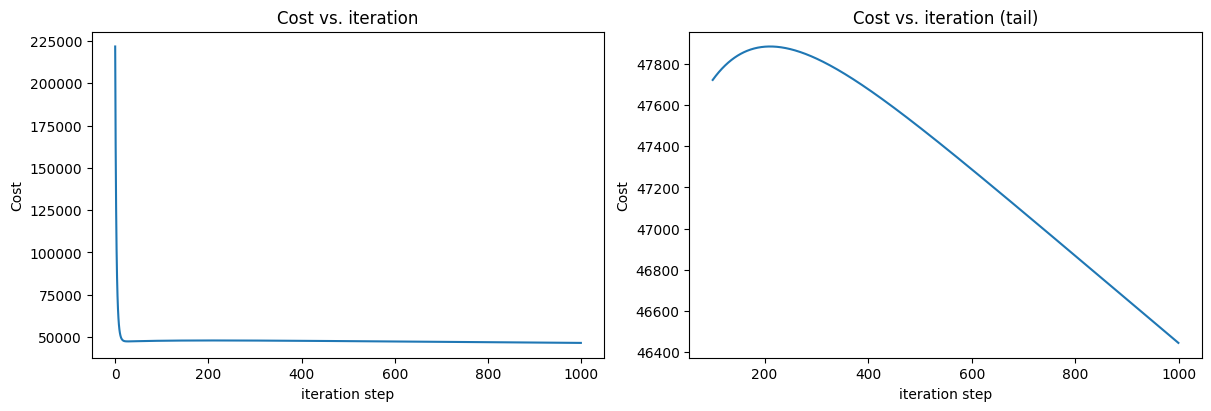

In [116]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

# Graphing the feature set

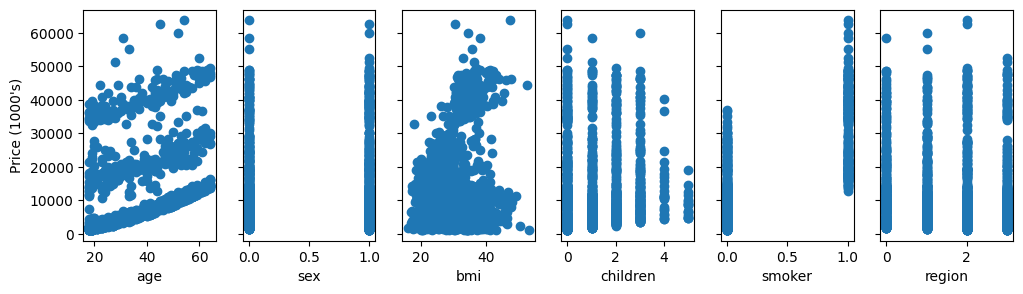

In [117]:
X_features = ['age','sex','bmi','children','smoker','region']
fig,ax=plt.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# Predicting using results from training set

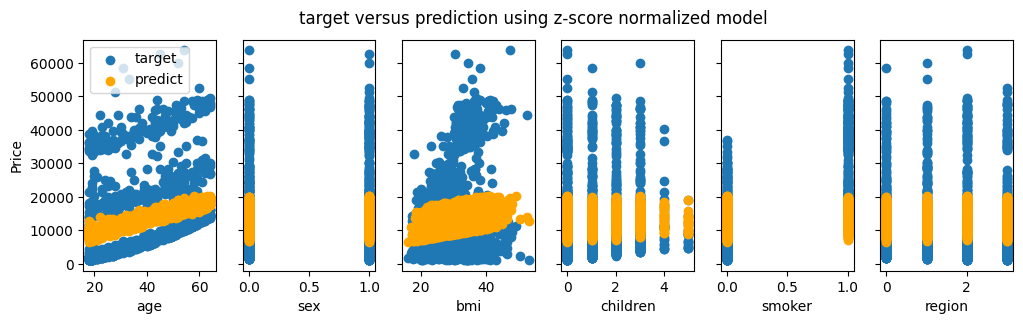

In [118]:
#predict target using normalized features
m = X_train.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_train[i], w) + b

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,6,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# Normalizing the training set X

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


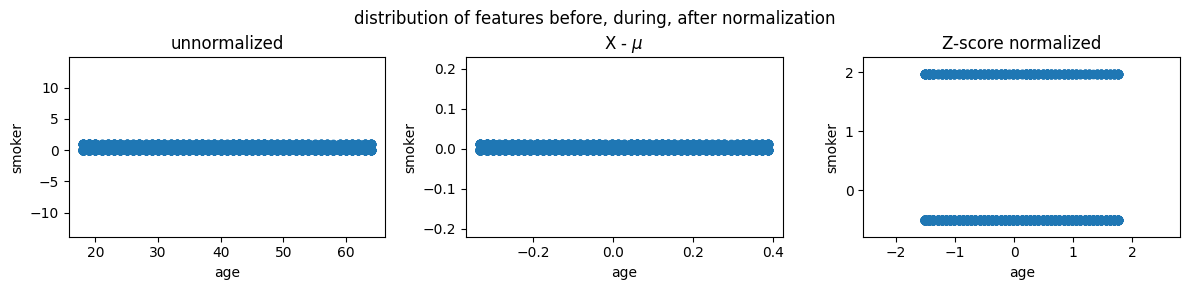

In [119]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)/(np.max(X_train) - np.min(X_train))
X_norm = (X_train - mu)/sigma      

print(X_train)
print(X_norm)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,4])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[4])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,4])
ax[1].set_xlabel(X_features[0])
ax[1].set_ylabel(X_features[4])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,4])
ax[2].set_xlabel(X_features[0])
ax[2].set_ylabel(X_features[4])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

# Gradient Descent on Z-score normalized training set

In [96]:
w_norm, b_norm, J_hist = gradient_descent(w_init, X_norm, b_init, y_train, 0.3, 1000)
print(w)
print(b)

Iteration    0: Cost 127248.05
Iteration  100: Cost 23159.26
Iteration  200: Cost 23159.26
Iteration  300: Cost 23159.26
Iteration  400: Cost 23159.26
Iteration  500: Cost 23159.26
Iteration  600: Cost 23159.26
Iteration  700: Cost 23159.26
Iteration  800: Cost 23159.26
Iteration  900: Cost 23159.26
[208.32911065  27.85735417 170.80020733  61.68238038 382.0647774
 -46.91782631]
-15.356123551607794


# Predicting using results from Z-score normalized training set

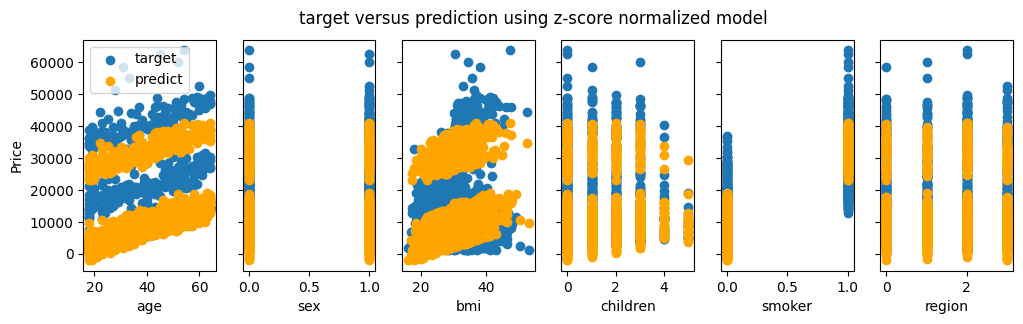

In [97]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,6,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# Adding Regularization to Gradient Descent

In [ ]:
def gradient_descent(w, X, b, y, alpha, num_iter):
    w = copy.deepcopy(w)
    b = b_init
    J_history = []
    for iter in range(num_iter):
        dj_dw, dj_db = compute_gradient(w, X, b, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db   
        
        if iter < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(w, X, b, y)) # Print cost every at intervals 10 times or as many iterations if < 10
                
        if iter % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {iter:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

w, b, J_hist = gradient_descent(w_init, X_train, b_init, y_train, 0.0001, 1000)

print(w)
print(b)
print(J_hist)

# Using Scitkit

We normalize the data with `StandardScaler()` and perform gradient descent with `SGDRegressor()`

In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() ## Normalizes the X_train values with a Z-score algorithm
X_norm_scikit = scaler.fit_transform(X_train)

sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm_scikit, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

b_norm_scikit = sgdr.intercept_
w_norm_scikit = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")
print(f"model parameters with scikit: w: {w_norm_scikit}, b:{b_norm_scikit}")

SGDRegressor()
number of iterations completed: 25, number of weight updates: 33451.0
model parameters: w: [3613.53615057  -65.55170114 2027.3168105   577.66033542 9612.57306988
 -390.58548034], b:13270.422265141251
model parameters with scikit: w: [3617.49731134  -36.24247431 2027.37858141  609.30242267 9675.36179412
 -389.22204259], b:[13334.2708028]


# Predicting using results from Z-score normalized training set using SciKit

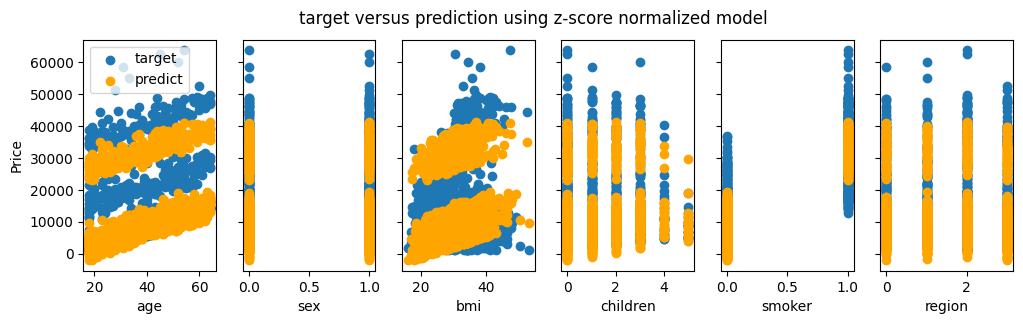

In [82]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm_scikit[i], w_norm_scikit) + b_norm_scikit

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,6,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [83]:
print("w", np.array_str(w, precision=2))
print("w_norm", np.array_str(w_norm, precision=2))
print("w_norm_scikit", np.array_str(w_norm_scikit, precision=2))

w [208.33  27.86 170.8   61.68 382.06 -46.92]
w_norm [3613.54  -65.55 2027.32  577.66 9612.57 -390.59]
w_norm_scikit [3617.5   -36.24 2027.38  609.3  9675.36 -389.22]


In [84]:
y_pred_sgd = sgdr.predict(X_norm_scikit)
# make a prediction using w,b. 
y_pred = np.dot(X_norm_scikit, w_norm_scikit) + b_norm_scikit
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[25236.55821907  3740.75065651  7071.61993059  3771.07981113]
Target values 
[16884.924    1725.5523   4449.462   21984.47061]


# Adding new features to the initial training set

[1.90e+01 0.00e+00 2.79e+01 0.00e+00 1.00e+00 3.00e+00 3.61e+02 6.86e+03
 1.30e+05 2.48e+06 4.70e+07 8.94e+08 1.70e+10 3.23e+11 6.13e+12 7.78e+02
 2.17e+04 5.30e+02]
[-1.44 -1.01 -0.45 -0.91  1.97  1.34 -1.22 -1.04 -0.9  -0.79 -0.71 -0.65
 -0.6  -0.55 -0.52 -0.51 -0.54 -1.3 ]


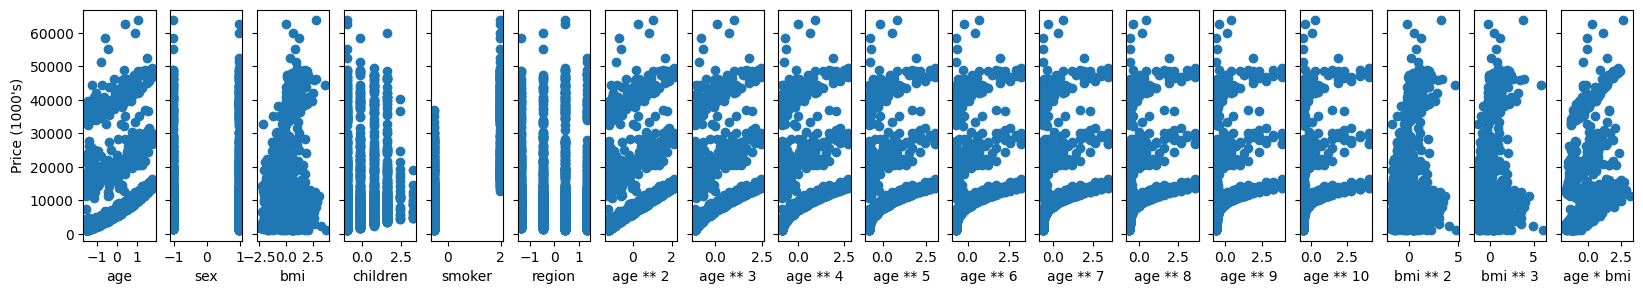

In [85]:
X_af = np.c_[
    X_train, 
    (X_train[:,0] ** 2), 
    (X_train[:,0] ** 3), 
    (X_train[:,0] ** 4), 
    (X_train[:,0] ** 5), 
    (X_train[:,0] ** 6), 
    (X_train[:,0] ** 7), 
    (X_train[:,0] ** 8), 
    (X_train[:,0] ** 9), 
    (X_train[:,0] ** 10), 
    (X_train[:,2] ** 2), 
    (X_train[:,2] ** 3), 
    (X_train[:,0] * X_train[:,2])
]
mu_af     = np.mean(X_af,axis=0)   
sigma_af  = np.std(X_af,axis=0)

X_norm_af = (X_af - mu_af) / sigma_af 

print(np.array_str(X_af[0], precision=2))
print(np.array_str(X_norm_af[0], precision=2))
X_features_with_new_features = ['age','sex','bmi','children','smoker','region', 'age ** 2', 'age ** 3', 'age ** 4', 'age ** 5', 'age ** 6', 'age ** 7', 'age ** 8', 'age ** 9', 'age ** 10', 'bmi ** 2', 'bmi ** 3', 'age * bmi']
fig, ax=plt.subplots(1, 18, figsize=(20, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm_af[:,i],y_train)
    ax[i].set_xlabel(X_features_with_new_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()


# Using SciKit to calculate Gradient Descent with feature engineering and normalization

In [86]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler_af = StandardScaler() ## Normalizes the X_train values with a Z-score algorithm
X_norm_scikit_af = scaler_af.fit_transform(X_af)

print(X_norm_scikit_af[0])

sgdr_af = SGDRegressor(max_iter=1000)
sgdr_af.fit(X_norm_scikit_af, y_train)
print(sgdr_af)
print(f"number of iterations completed: {sgdr_af.n_iter_}, number of weight updates: {sgdr_af.t_}")

b_norm_scikit_af = sgdr_af.intercept_
w_norm_scikit_af = sgdr_af.coef_
print(f"model parameters with scikit: w: {w_norm_scikit_af}, b:{w_norm_scikit_af}")

[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459
 -1.22046238 -1.03896364 -0.89794015 -0.79095765 -0.70941649 -0.64606393
 -0.59565577 -0.55460509 -0.52048231 -0.51324102 -0.54400294 -1.30447634]
SGDRegressor()
number of iterations completed: 18, number of weight updates: 24085.0
model parameters with scikit: w: [ 606.83407156  -25.86284692 1971.93581547  769.34079425 9653.45121851
 -419.33769247  727.0716322   775.04492715  724.59772502  586.82357095
  387.25650954  151.33355706 -101.15221842 -356.68707152 -606.86454076
  634.27634135 -847.89406132  538.22448733], b:[ 606.83407156  -25.86284692 1971.93581547  769.34079425 9653.45121851
 -419.33769247  727.0716322   775.04492715  724.59772502  586.82357095
  387.25650954  151.33355706 -101.15221842 -356.68707152 -606.86454076
  634.27634135 -847.89406132  538.22448733]


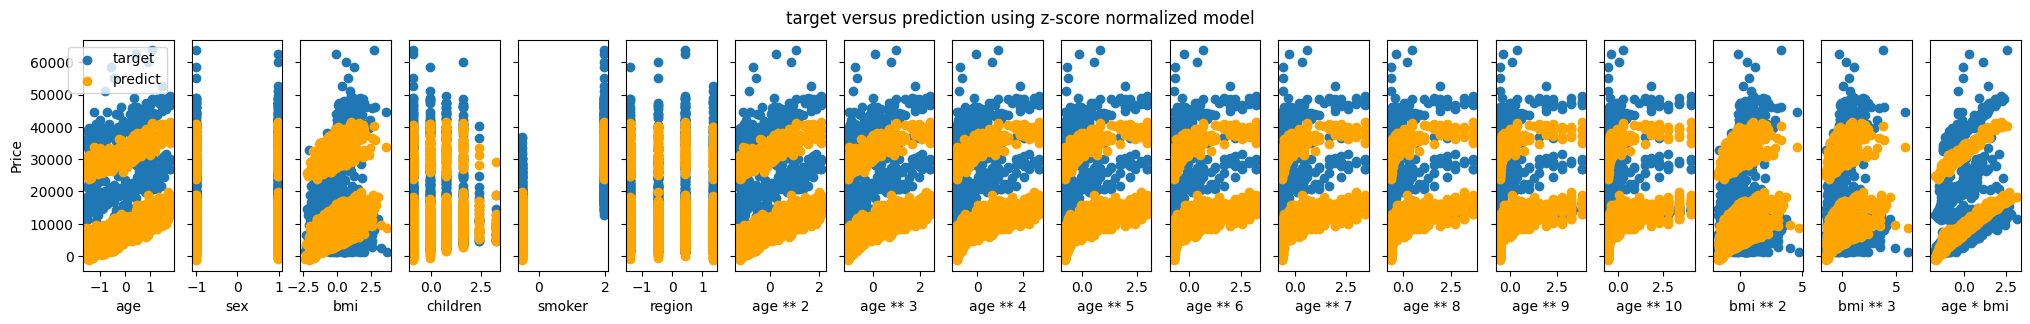

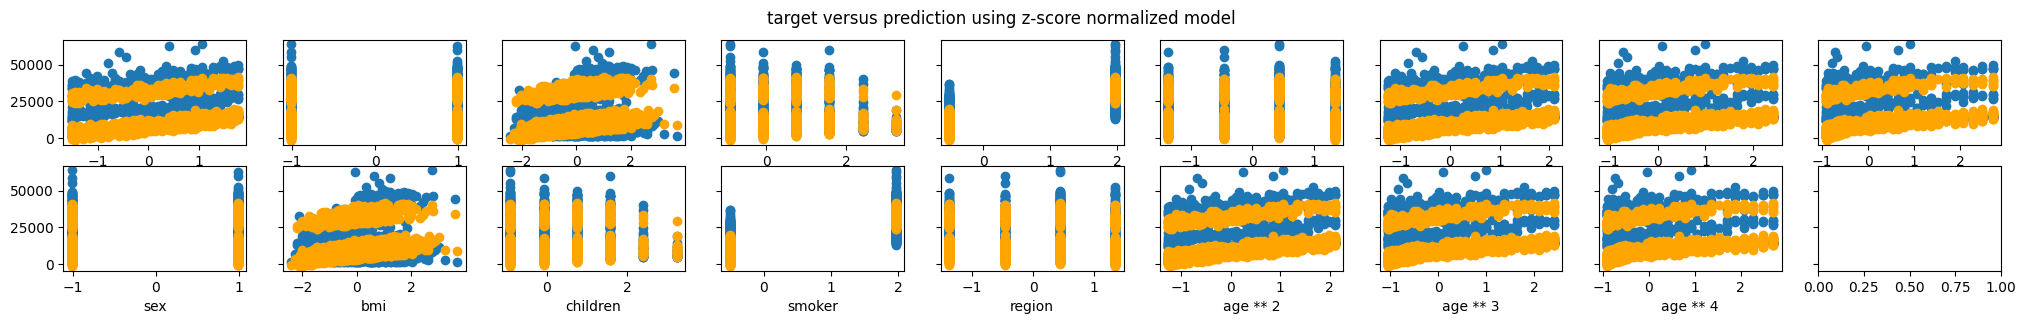

In [108]:
#predict target using normalized features
m = X_norm_scikit_af.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm_scikit_af[i], w_norm_scikit_af) + b_norm_scikit_af

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,18,figsize=(25, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm_scikit_af[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features_with_new_features[i])
    ax[i].scatter(X_norm_scikit_af[:,i], yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()


fig, ax = plt.subplots(2,9,figsize=(25, 3),sharey=True)
i = len(ax)
j = len(ax[0])
for i in range(i):
    for j in range(j):
        ax[i][j].scatter(X_norm_scikit_af[:,i + j], y_train, label = 'target')
        ax[i][j].set_xlabel(X_features_with_new_features[i + j])
        ax[i][j].scatter(X_norm_scikit_af[:,i + j], yp,color="orange", label = 'predict')
# ax.set_ylabel("Price"); 
# ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [105]:
m,n = X_train.shape

for i in range(m):
    result_i = np.dot(X_norm[i], w_norm) + b_norm
    result_scikit_af = np.dot(X_norm_scikit_af[i], w_norm_scikit_af) + b_norm_scikit_af
    print("Result for normalized:", result_i, "(", abs(y_train[i]-result_i) ,") additional features", result_scikit_af[0], "(", abs(y_train[i]-result_scikit_af[0]), ") vs actual:", y_train[i])

Result for normalized: 25111.241863628304 ( 8226.317863628305 ) additional features 26136.081337536125 ( 9251.157337536126 ) vs actual: 16884.924
Result for normalized: 3687.6051728414513 ( 1962.0528728414513 ) additional features 4937.464152087325 ( 3211.9118520873244 ) vs actual: 1725.5523
Result for normalized: 6963.1457066857565 ( 2513.683706685756 ) additional features 7338.498159284115 ( 2889.0361592841145 ) vs actual: 4449.462
Result for normalized: 3741.3084054650863 ( 18243.162204534914 ) additional features 3118.361073830534 ( 18866.109536169468 ) vs actual: 21984.47061
Result for normalized: 5537.640897203206 ( 1670.785697203206 ) additional features 5123.043606986415 ( 1256.1884069864154 ) vs actual: 3866.8552
Result for normalized: 4013.5531701676064 ( 256.9315701676064 ) additional features 3526.765528265476 ( 229.856071734524 ) vs actual: 3756.6216
Result for normalized: 10913.033704849346 ( 2672.4441048493463 ) additional features 10346.97018466091 ( 2106.3805846609102 